##### Copyright 2023 The TF-Agents Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# DQN C51/Rainbow

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/agents/tutorials/9_c51_tutorial">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/agents/blob/master/docs/tutorials/9_c51_tutorial.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/agents/blob/master/docs/tutorials/9_c51_tutorial.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/agents/docs/tutorials/9_c51_tutorial.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Introduction

This example shows how to train a [Categorical DQN (C51)](https://arxiv.org/pdf/1707.06887.pdf) agent on the Cartpole environment using the TF-Agents library.

![Cartpole environment](https://github.com/tensorflow/agents/blob/master/docs/tutorials/images/cartpole.png?raw=1)

Make sure you take a look through the [DQN tutorial](https://github.com/tensorflow/agents/blob/master/docs/tutorials/1_dqn_tutorial.ipynb) as a prerequisite. This tutorial will assume familiarity with the DQN tutorial; it will mainly focus on the differences between DQN and C51.


## Setup


If you haven't installed tf-agents yet, run:

In [2]:
!sudo apt-get update
!sudo apt-get install -y xvfb ffmpeg freeglut3-dev
!pip install 'imageio==2.4.0'
!pip install pyvirtualdisplay
!pip install tf-agents
!pip install pyglet
!pip install tf-keras

Hit:1 http://us-central1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease
0% [Connecting to security.ubuntu.com (91.189.91.81)] [Connecting to apt.llvm.o

Hit:5 https://download.docker.com/linux/ubuntu focal InRelease
Get:6 https://nvidia.github.io/libnvidia-container/stable/ubuntu18.04/amd64  InRelease [1484 B]
Hit:7 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:8 https://nvidia.github.io/nvidia-container-runtime/stable/ubuntu18.04/amd64  InRelease
Hit:9 https://nvidia.github.io/nvidia-docker/ubuntu18.04/amd64  InRelease
0% [Waiting for headers] [Connecting to ppa.launchpad.net (185.125.190.80)]

Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
0% [Connecting to ppa.launchpad.net (185.125.190.80)]

0% [Waiting for headers]

Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
0% [Working]

Hit:4 https://apt.llvm.org/focal llvm-toolchain-focal-17 InRelease
0% [Waiting for headers]

Hit:12 http://ppa.launchpad.net/longsleep/golang-backports/ubuntu focal InRelease
0% [Working]

0% [Waiting for headers]

Hit:13 http://ppa.launchpad.net/openjdk-r/ppa/ubuntu focal InRelease
0% [Working]

0% [Working]

0% [Working]

0% [Working]

0% [Working]

0% [Working]

0% [Working]

0% [Working]

0% [Working]

Fetched 1484 B in 1s (1065 B/s)




freeglut3-dev is already the newest version (2.8.1-3).
ffmpeg is already the newest version (7:4.2.7-0ubuntu0.1).
xvfb is already the newest version (2:1.20.13-1ubuntu1~20.04.15).


The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libparted-fs-resize0 libxmlb2
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 187 not upgraded.


  Using cached imageio-2.4.0-py3-none-any.whl


  Attempting uninstall: imageio
    Found existing installation: imageio 2.34.0
    Uninstalling imageio-2.34.0:
      Successfully uninstalled imageio-2.34.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.22.0 requires imageio>=2.27, but you have imageio 2.4.0 which is incompatible.


  Using cached PyVirtualDisplay-3.0-py3-none-any.whl.metadata (943 bytes)
Using cached PyVirtualDisplay-3.0-py3-none-any.whl (15 kB)


  Using cached tf_agents-0.19.0-py3-none-any.whl.metadata (12 kB)


  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)


  Using cached gin_config-0.5.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached gym-0.23.0-py3-none-any.whl


  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)


  Using cached pygame-2.1.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.3 kB)
  Using cached tensorflow_probability-0.23.0-py2.py3-none-any.whl.metadata (13 kB)


  Using cached gym_notices-0.0.8-py3-none-any.whl.metadata (1.0 kB)


Using cached tf_agents-0.19.0-py3-none-any.whl (1.4 MB)
Using cached pygame-2.1.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.7 MB)


Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
Using cached cloudpickle-3.0.0-py3-none-any.whl (20 kB)
Using cached gin_config-0.5.0-py3-none-any.whl (61 kB)
Using cached tensorflow_probability-0.23.0-py2.py3-none-any.whl (6.9 MB)
Using cached gym_notices-0.0.8-py3-none-any.whl (3.0 kB)


  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.10.0
    Uninstalling typing_extensions-4.10.0:


      Successfully uninstalled typing_extensions-4.10.0


In [3]:
import os
# Keep using keras-2 (tf-keras) rather than keras-3 (keras).
os.environ['TF_USE_LEGACY_KERAS'] = '1'

In [4]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import base64
import imageio
import IPython
import matplotlib
import matplotlib.pyplot as plt
import PIL.Image
import pyvirtualdisplay

import tensorflow as tf

from tf_agents.agents.categorical_dqn import categorical_dqn_agent
from tf_agents.drivers import dynamic_step_driver
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import categorical_q_network
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.trajectories import trajectory
from tf_agents.utils import common

# Set up a virtual display for rendering OpenAI gym environments.
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

## Hyperparameters

In [5]:
env_name = "CartPole-v1" # @param {type:"string"}
num_iterations = 15000 # @param {type:"integer"}

initial_collect_steps = 1000  # @param {type:"integer"} 
collect_steps_per_iteration = 1  # @param {type:"integer"}
replay_buffer_capacity = 100000  # @param {type:"integer"}

fc_layer_params = (100,)

batch_size = 64  # @param {type:"integer"}
learning_rate = 1e-3  # @param {type:"number"}
gamma = 0.99
log_interval = 200  # @param {type:"integer"}

num_atoms = 51  # @param {type:"integer"}
min_q_value = -20  # @param {type:"integer"}
max_q_value = 20  # @param {type:"integer"}
n_step_update = 2  # @param {type:"integer"}

num_eval_episodes = 10  # @param {type:"integer"}
eval_interval = 1000  # @param {type:"integer"}

## Environment

Load the environment as before, with one for training and one for evaluation. Here we use CartPole-v1 (vs. CartPole-v0 in the DQN tutorial), which has a larger max reward of 500 rather than 200.

In [6]:
train_py_env = suite_gym.load(env_name)
eval_py_env = suite_gym.load(env_name)

train_env = tf_py_environment.TFPyEnvironment(train_py_env)
eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)

## Agent

C51 is a Q-learning algorithm based on DQN. Like DQN, it can be used on any environment with a discrete action space.

The main difference between C51 and DQN is that rather than simply predicting the Q-value for each state-action pair, C51 predicts a histogram model for the probability distribution of the Q-value:

![Example C51 Distribution](images/c51_distribution.png)

By learning the distribution rather than simply the expected value, the algorithm is able to stay more stable during training, leading to improved final performance. This is particularly true in situations with bimodal or even multimodal value distributions, where a single average does not provide an accurate picture.

In order to train on probability distributions rather than on values, C51 must perform some complex distributional computations in order to calculate its loss function. But don't worry, all of this is taken care of for you in TF-Agents!

To create a C51 Agent, we first need to create a `CategoricalQNetwork`. The API of the `CategoricalQNetwork` is the same as that of the `QNetwork`, except that there is an additional argument `num_atoms`. This represents the number of support points in our probability distribution estimates. (The above image includes 10 support points, each represented by a vertical blue bar.) As you can tell from the name, the default number of atoms is 51.


In [7]:
categorical_q_net = categorical_q_network.CategoricalQNetwork(
    train_env.observation_spec(),
    train_env.action_spec(),
    num_atoms=num_atoms,
    fc_layer_params=fc_layer_params)

We also need an `optimizer` to train the network we just created, and a `train_step_counter` variable to keep track of how many times the network was updated.

Note that one other significant difference from vanilla `DqnAgent` is that we now need to specify `min_q_value` and `max_q_value` as arguments. These specify the most extreme values of the support (in other words, the most extreme of the 51 atoms on either side). Make sure to choose these appropriately for your particular environment. Here we use -20 and 20.

In [8]:
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)

train_step_counter = tf.Variable(0)

agent = categorical_dqn_agent.CategoricalDqnAgent(
    train_env.time_step_spec(),
    train_env.action_spec(),
    categorical_q_network=categorical_q_net,
    optimizer=optimizer,
    min_q_value=min_q_value,
    max_q_value=max_q_value,
    n_step_update=n_step_update,
    td_errors_loss_fn=common.element_wise_squared_loss,
    gamma=gamma,
    train_step_counter=train_step_counter)
agent.initialize()

One last thing to note is that we also added an argument to use n-step updates with $n$ = 2. In single-step Q-learning ($n$ = 1), we only compute the error between the Q-values at the current time step and the next time step using the single-step return (based on the Bellman optimality equation). The single-step return is defined as:

$G_t = R_{t + 1} + \gamma V(s_{t + 1})$

where we define $V(s) = \max_a{Q(s, a)}$.

N-step updates involve expanding the standard single-step return function $n$ times:

$G_t^n = R_{t + 1} + \gamma R_{t + 2} + \gamma^2 R_{t + 3} + \dots + \gamma^n V(s_{t + n})$

N-step updates enable the agent to bootstrap from further in the future, and with the right value of $n$, this often leads to faster learning.

Although C51 and n-step updates are often combined with prioritized replay to form the core of the [Rainbow agent](https://arxiv.org/pdf/1710.02298.pdf), we saw no measurable improvement from implementing prioritized replay. Moreover, we find that when combining our C51 agent with n-step updates alone, our agent performs as well as other Rainbow agents on the sample of Atari environments we've tested.

## Metrics and Evaluation

The most common metric used to evaluate a policy is the average return. The return is the sum of rewards obtained while running a policy in an environment for an episode, and we usually average this over a few episodes. We can compute the average return metric as follows.


In [9]:
#@test {"skip": true}
def compute_avg_return(environment, policy, num_episodes=10):

  total_return = 0.0
  for _ in range(num_episodes):

    time_step = environment.reset()
    episode_return = 0.0

    while not time_step.is_last():
      action_step = policy.action(time_step)
      time_step = environment.step(action_step.action)
      episode_return += time_step.reward
    total_return += episode_return

  avg_return = total_return / num_episodes
  return avg_return.numpy()[0]


random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(),
                                                train_env.action_spec())

compute_avg_return(eval_env, random_policy, num_eval_episodes)

# Please also see the metrics module for standard implementations of different
# metrics.

37.7

## Data Collection

As in the DQN tutorial, set up the replay buffer and the initial data collection with the random policy.

In [10]:
#@test {"skip": true}
replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec=agent.collect_data_spec,
    batch_size=train_env.batch_size,
    max_length=replay_buffer_capacity)

def collect_step(environment, policy):
  time_step = environment.current_time_step()
  action_step = policy.action(time_step)
  next_time_step = environment.step(action_step.action)
  traj = trajectory.from_transition(time_step, action_step, next_time_step)

  # Add trajectory to the replay buffer
  replay_buffer.add_batch(traj)

for _ in range(initial_collect_steps):
  collect_step(train_env, random_policy)

# This loop is so common in RL, that we provide standard implementations of
# these. For more details see the drivers module.

# Dataset generates trajectories with shape [BxTx...] where
# T = n_step_update + 1.
dataset = replay_buffer.as_dataset(
    num_parallel_calls=3, sample_batch_size=batch_size,
    num_steps=n_step_update + 1).prefetch(3)

iterator = iter(dataset)

Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


## Training the agent

The training loop involves both collecting data from the environment and optimizing the agent's networks. Along the way, we will occasionally evaluate the agent's policy to see how we are doing.

The following will take ~7 minutes to run.

In [11]:
#@test {"skip": true}
try:
  %%time
except:
  pass

# (Optional) Optimize by wrapping some of the code in a graph using TF function.
agent.train = common.function(agent.train)

# Reset the train step
agent.train_step_counter.assign(0)

# Evaluate the agent's policy once before training.
avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
returns = [avg_return]

for _ in range(num_iterations):

  # Collect a few steps using collect_policy and save to the replay buffer.
  for _ in range(collect_steps_per_iteration):
    collect_step(train_env, agent.collect_policy)

  # Sample a batch of data from the buffer and update the agent's network.
  experience, unused_info = next(iterator)
  train_loss = agent.train(experience)

  step = agent.train_step_counter.numpy()

  if step % log_interval == 0:
    print('step = {0}: loss = {1}'.format(step, train_loss.loss))

  if step % eval_interval == 0:
    avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
    print('step = {0}: Average Return = {1:.2f}'.format(step, avg_return))
    returns.append(avg_return)

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))


step = 200: loss = 3.2159409523010254


step = 400: loss = 2.422974109649658


step = 600: loss = 1.9803032875061035


step = 800: loss = 1.733839750289917


step = 1000: loss = 1.705157995223999


step = 1000: Average Return = 88.60


step = 1200: loss = 1.655350923538208


step = 1400: loss = 1.419114351272583


step = 1600: loss = 1.2578476667404175


step = 1800: loss = 1.3189895153045654


step = 2000: loss = 0.9676651954650879


step = 2000: Average Return = 130.80


step = 2200: loss = 0.7909003496170044


step = 2400: loss = 0.9291537404060364


step = 2600: loss = 0.8300429582595825


step = 2800: loss = 0.9739845991134644


step = 3000: loss = 0.5435967445373535


step = 3000: Average Return = 261.40


step = 3200: loss = 0.7065144777297974


step = 3400: loss = 0.8492055535316467


step = 3600: loss = 0.808651864528656


step = 3800: loss = 0.48259130120277405


step = 4000: loss = 0.9187874794006348


step = 4000: Average Return = 280.90


step = 4200: loss = 0.7415772676467896


step = 4400: loss = 0.621947169303894


step = 4600: loss = 0.5226543545722961


step = 4800: loss = 0.7011302709579468


step = 5000: loss = 0.7732619047164917


step = 5000: Average Return = 271.70


step = 5200: loss = 0.8493011593818665


step = 5400: loss = 0.6786139011383057


step = 5600: loss = 0.5639233589172363


step = 5800: loss = 0.48468759655952454


step = 6000: loss = 0.6366198062896729


step = 6000: Average Return = 350.70


step = 6200: loss = 0.4855012893676758


step = 6400: loss = 0.4458327889442444


step = 6600: loss = 0.6745614409446716


step = 6800: loss = 0.5021890997886658


step = 7000: loss = 0.4639193117618561


step = 7000: Average Return = 343.00


step = 7200: loss = 0.4711253345012665


step = 7400: loss = 0.5891958475112915


step = 7600: loss = 0.3957907557487488


step = 7800: loss = 0.4868921637535095


step = 8000: loss = 0.5140666365623474


step = 8000: Average Return = 396.10


step = 8200: loss = 0.6051771640777588


step = 8400: loss = 0.6179391741752625


step = 8600: loss = 0.5253893733024597


step = 8800: loss = 0.3697047531604767


step = 9000: loss = 0.7271263599395752


step = 9000: Average Return = 320.20


step = 9200: loss = 0.5285177826881409


step = 9400: loss = 0.4590812921524048


step = 9600: loss = 0.4743385910987854


step = 9800: loss = 0.47938746213912964


step = 10000: loss = 0.5290409326553345


step = 10000: Average Return = 433.00


step = 10200: loss = 0.4573556184768677


step = 10400: loss = 0.352144718170166


step = 10600: loss = 0.39160820841789246


step = 10800: loss = 0.3254846930503845


step = 11000: loss = 0.37145161628723145


step = 11000: Average Return = 414.60


step = 11200: loss = 0.382583349943161


step = 11400: loss = 0.44465434551239014


step = 11600: loss = 0.4484185576438904


step = 11800: loss = 0.248131662607193


step = 12000: loss = 0.5516679883003235


step = 12000: Average Return = 375.40


step = 12200: loss = 0.3307253420352936


step = 12400: loss = 0.19486135244369507


step = 12600: loss = 0.31668007373809814


step = 12800: loss = 0.4462052285671234


step = 13000: loss = 0.241848886013031


step = 13000: Average Return = 326.80


step = 13200: loss = 0.20919030904769897


step = 13400: loss = 0.2044396996498108


step = 13600: loss = 0.428558886051178


step = 13800: loss = 0.1880824714899063


step = 14000: loss = 0.34256821870803833


step = 14000: Average Return = 345.50


step = 14200: loss = 0.22452744841575623


step = 14400: loss = 0.29694461822509766


step = 14600: loss = 0.4149337410926819


step = 14800: loss = 0.41922691464424133


step = 15000: loss = 0.4064670205116272


step = 15000: Average Return = 242.10


## Visualization


### Plots

We can plot return vs global steps to see the performance of our agent. In `Cartpole-v1`, the environment gives a reward of +1 for every time step the pole stays up, and since the maximum number of steps is 500, the maximum possible return is also 500.

(-11.255000400543214, 550.0)

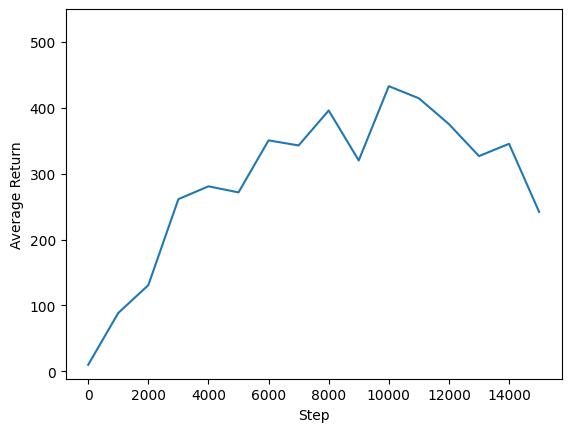

In [12]:
#@test {"skip": true}

steps = range(0, num_iterations + 1, eval_interval)
plt.plot(steps, returns)
plt.ylabel('Average Return')
plt.xlabel('Step')
plt.ylim(top=550)

### Videos

It is helpful to visualize the performance of an agent by rendering the environment at each step. Before we do that, let us first create a function to embed videos in this colab.

In [13]:
def embed_mp4(filename):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  Your browser does not support the video tag.
  </video>'''.format(b64.decode())

  return IPython.display.HTML(tag)

The following code visualizes the agent's policy for a few episodes:

In [14]:
num_episodes = 3
video_filename = 'imageio.mp4'
with imageio.get_writer(video_filename, fps=60) as video:
  for _ in range(num_episodes):
    time_step = eval_env.reset()
    video.append_data(eval_py_env.render())
    while not time_step.is_last():
      action_step = agent.policy.action(time_step)
      time_step = eval_env.step(action_step.action)
      video.append_data(eval_py_env.render())

embed_mp4(video_filename)

[swscaler @ 0x55f48c41d880] Warning: data is not aligned! This can lead to a speed loss


C51 tends to do slightly better than DQN on CartPole-v1, but the difference between the two agents becomes more and more significant in increasingly complex environments. For example, on the full Atari 2600 benchmark, C51 demonstrates a mean score improvement of 126% over DQN after normalizing with respect to a random agent. Additional improvements can be gained by including n-step updates.

For a deeper dive into the C51 algorithm, see [A Distributional Perspective on Reinforcement Learning (2017)](https://arxiv.org/pdf/1707.06887.pdf).